In [1]:
import pandas as pd
import numpy as np
import sys, os

from scipy.interpolate import CubicSpline, CubicHermiteSpline

import matplotlib.pyplot as plt

In [2]:
rates = pd.read_csv("data/rates.csv")
rates.head()

,date_current,_1_month,_2_months,_3_months,_6_months,_1_year,_2_years,_3_years,_5_years,_7_years,_10_years,_20_years,_30_years
0,2020-06-01,0.12,0.14,0.14,0.18,0.17,0.14,0.20,0.31,0.50,0.66,1.22,1.46
1,2020-06-02,0.12,0.13,0.15,0.18,0.17,0.17,0.20,0.32,0.52,0.68,1.24,1.48
2,2020-06-03,0.12,0.14,0.16,0.19,0.17,0.19,0.26,0.38,0.59,0.77,1.32,1.56
3,2020-06-04,0.13,0.15,0.15,0.18,0.17,0.19,0.26,0.40,0.63,0.82,1.38,1.61
4,2020-06-05,0.13,0.14,0.15,0.18,0.18,0.22,0.29,0.47,0.71,0.91,1.46,1.68


In [3]:
mats = [
    21,
    42,
    63,
    126,
    252,
    504,
    756,
    252 * 5,
    252 * 7,
    252 * 10,
    252 * 20,
    252 * 30,
]

In [4]:
y = rates.iloc[0, 1:].values
y

array([0.12, 0.14, 0.14, 0.18, 0.17, 0.14, 0.2, 0.31, 0.5, 0.66, 1.22,
       1.46], dtype=object)

In [5]:
cs = CubicSpline(mats, y)

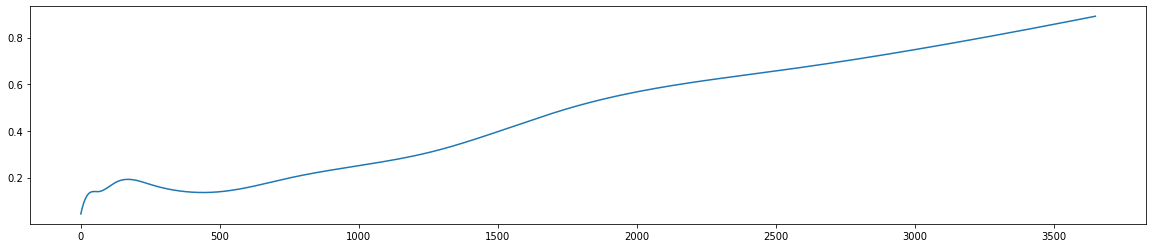

In [6]:
x = np.arange(0, 3650, 1)
plt.figure(figsize=(20, 4))
plt.plot(x, cs(x))
plt.show()

In [7]:
ratemap = pd.read_csv("data/ratemap.csv")

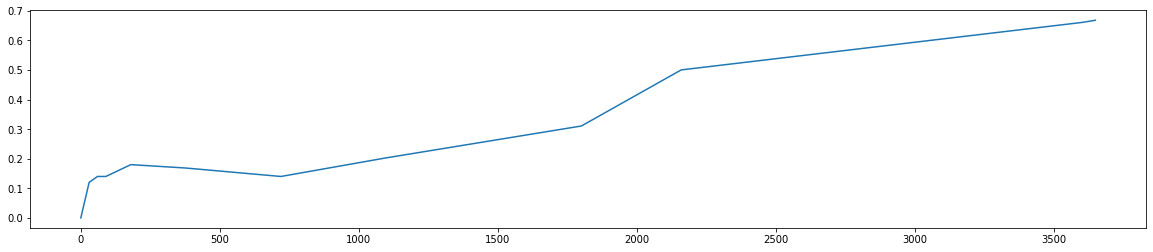

In [8]:
plt.figure(figsize=(20, 4))
plt.plot(ratemap.days_to_expiry.values, ratemap.rate.values)
plt.show()

### Yield Curve Per Day

In [9]:
x = np.arange(0, 3651, 1)
mats = [
    0,
    21,
    42,
    63,
    126,
    252,
    504,
    756,
    252 * 5,
    252 * 7,
    252 * 10,
    252 * 20,
    252 * 30,
]

def yield_curve(y):
    
    dc = y.values[0][0]
    y = [0] + y.values[0][1:].tolist()
    
    cs = CubicSpline(mats, y, bc_type="clamped")
    
    df = pd.DataFrame()
    df['days_to_expiry'] = x
    df['rate'] = cs(x)
    df['date_current'] = dc
    
    return df

ratemap = rates.groupby("date_current", axis=0, as_index=False)
ratemap = ratemap.apply(yield_curve).reset_index(drop=True)

In [10]:
ratemap.to_csv("data/cubic_ratemap.csv", index=False)